# Pregunta 7. Consulta datos agrupados por un campo categórico.

Mostrar:
- Agrupar por campo categorico sino crearlo
- Grafico de todas las categorias

### IMPORTS
---

In [315]:
import pandas as pd
import numpy as np
import copy

### RAW DATAFRAME
---

In [316]:
data: pd.DataFrame = pd.read_csv("../data/cleaned_csv/3-question_results/cases.csv", index_col="case_id")
data.head(10)

,year,month,state,location,species,status,illnesses,hospitalizations,fatalities
case_id,,,,,,,,,
1,1998,January,California,Restaurant,NaN,NaN,20,0.0,0.0
2,1998,January,California,NaN,NaN,NaN,112,0.0,0.0
3,1998,January,California,Restaurant,NaN,NaN,35,0.0,0.0
4,1998,January,California,Restaurant,Scombroid toxin,Confirmed,4,0.0,0.0
5,1998,January,California,Private Home/Residence,Salmonella enterica,Confirmed,26,3.0,0.0
6,1998,January,California,Restaurant,Shigella boydii,Confirmed,25,3.0,0.0
7,1998,January,California,Restaurant,NaN,NaN,8,0.0,0.0
8,1998,January,California,Restaurant,Salmonella enterica,Confirmed,4,3.0,0.0
9,1998,January,Colorado,Restaurant,Virus,Suspected,21,NaN,NaN


### CATEGORICAL
---

- Columna categorica 'status'
- Valores Confirmado / Sospechoso

> Tabla de frecuencia de estado pacientes

In [317]:
pd.value_counts(data['status'])

Confirmed    7339
Suspected    3836
Name: status, dtype: int64

> Tabla de contingencia estado paciente/estado

In [318]:
pd.crosstab(index=data['status'],
            columns=data['state'], margins=True)

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,Texas,Utah,Vermont,Virginia,Washington,Washington DC,West Virginia,Wisconsin,Wyoming,All
status,,,,,,,,,,,,,,,,,,,,,
Confirmed,29,56,126,23,619,183,171,5,395,181,...,114,57,23,157,207,13,22,332,38,7339
Suspected,5,12,46,13,831,163,25,1,799,72,...,27,13,0,34,313,8,3,29,4,3836
All,34,68,172,36,1450,346,196,6,1194,253,...,141,70,23,191,520,21,25,361,42,11175


> Tabla de contingencia  porcentajes relativos segun estado

In [319]:
pd.crosstab(index=data['status'], columns=data['state']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,Washington DC,West Virginia,Wisconsin,Wyoming
status,,,,,,,,,,,,,,,,,,,,,
Confirmed,85.294118,82.352941,73.255814,63.888889,42.689655,52.890173,87.244898,83.333333,33.082077,71.541502,...,81.428571,80.851064,81.428571,100.0,82.198953,39.807692,61.904762,88.0,91.966759,90.47619
Suspected,14.705882,17.647059,26.744186,36.111111,57.310345,47.109827,12.755102,16.666667,66.917923,28.458498,...,18.571429,19.148936,18.571429,0.0,17.801047,60.192308,38.095238,12.0,8.033241,9.52381


### GRÁFICOS
---

> Grafico estado pacientes en total

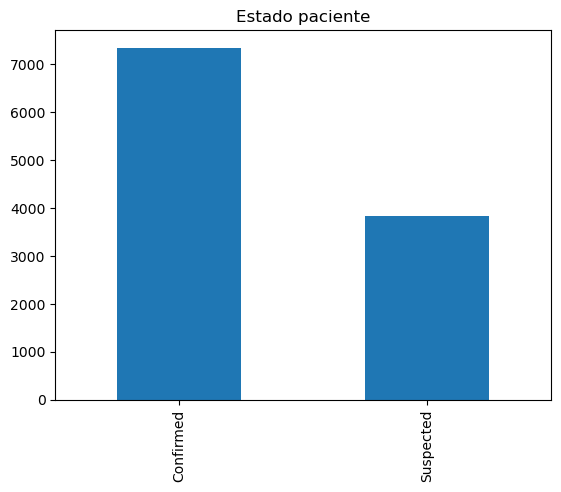

In [320]:
plot = data['status'].value_counts().plot(kind='bar',
                                            title='Estado paciente')

> Gráfico de tarta del estado de los pacientes

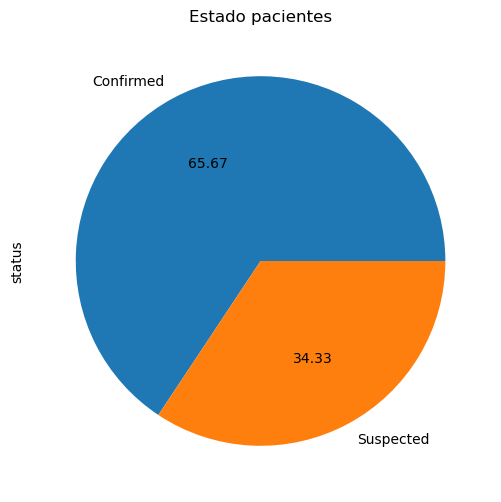

In [321]:
plot = data['status'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Estado pacientes')

  Conclusión:

> Podemos verificar que el numero de pacientes con estado confirmado supera el doble a los casos de sospecha en toda la base de datos.

## GRÁFICOS CON BASE DE DATOS REDUCIDA PARA MÁS VISUALIZACIÓN
---

> Al ser una base de datos extensa, se ha considerado sólo coger datos de los estados de Nueva York, Ohio, Florida, California y Washington para mejor visualización.

> Es una tabla de todos los años disponibles

In [322]:
datastate = data.loc[(data["state"] == 'Washington') | (data["state"] == "Ohio") | (data["state"] == "Florida")| (data["state"] == "New York") | (data["state"] == "California")]

> Gráfico de barras de estado paciientes segun estado en porcetanje relativo

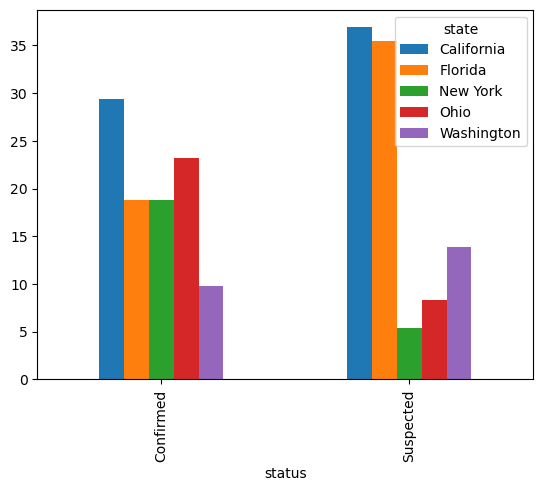

In [323]:
plot = pd.crosstab(index=datastate['status'],
            columns=datastate['state']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

> Gráfico barras/stack del porcentaje relativo del estado de los pacientes

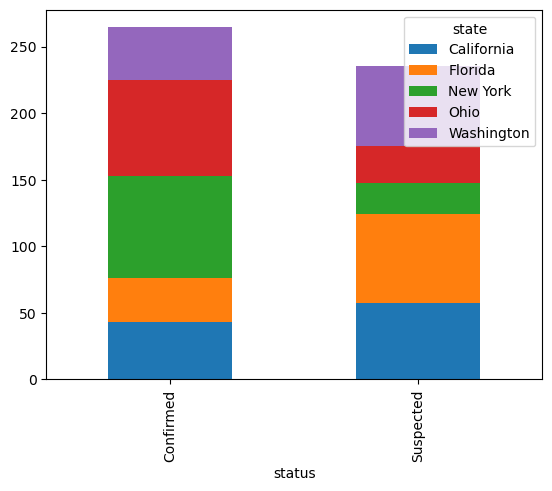

In [324]:
plot = pd.crosstab(index=datastate['status'],
            columns=datastate['state']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

Conclusión:

> Los estados de Florida y California són los que concentran la mayoria de casos siendo California la que más.

> En canvio los estados de Nueva York o Ohio son los que menos casos de sospecha en relación a los confirmados tienen.